In [1]:
import pandas as pd
import matplotlib.pyplot as plt

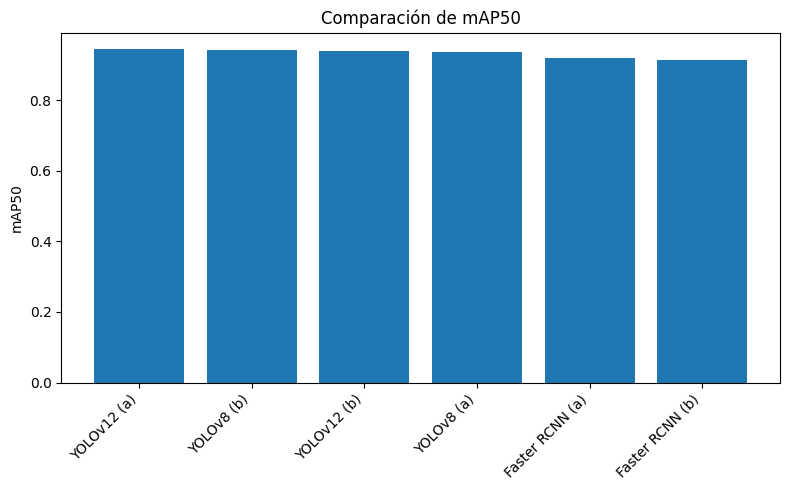

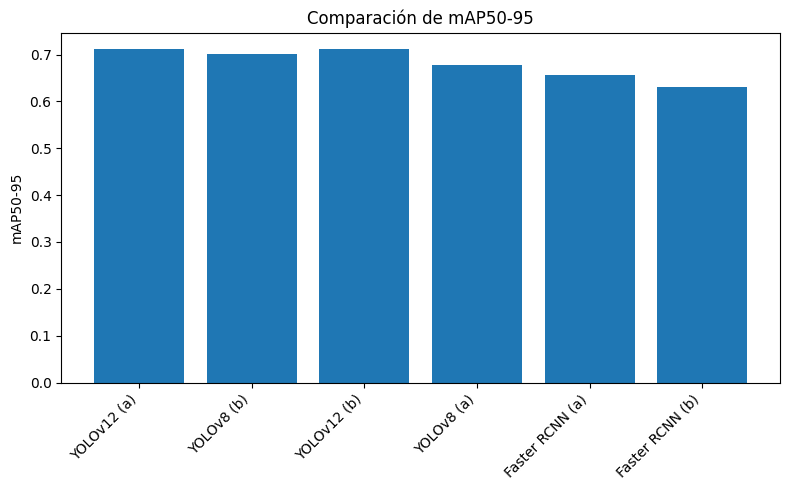

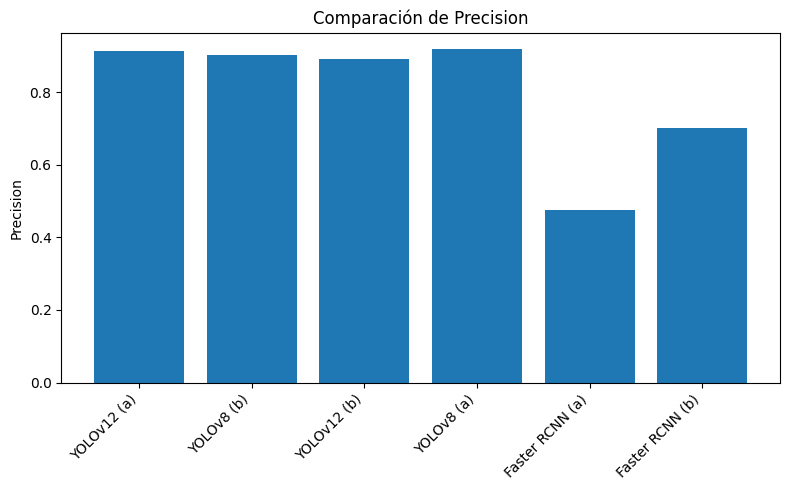

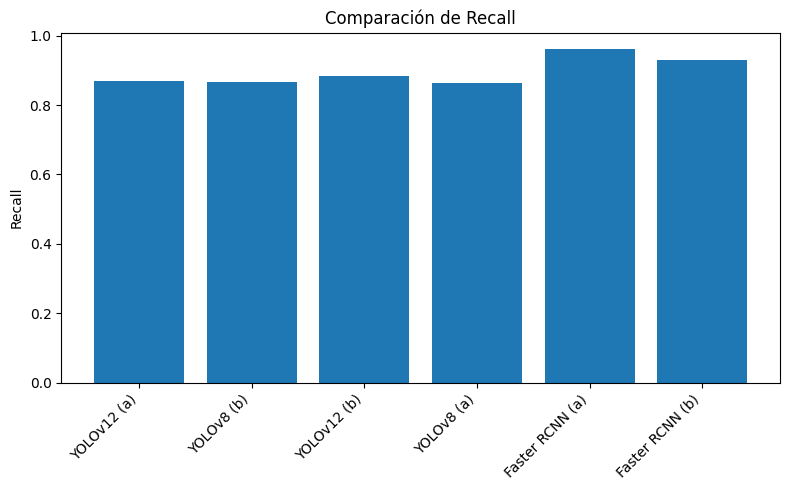

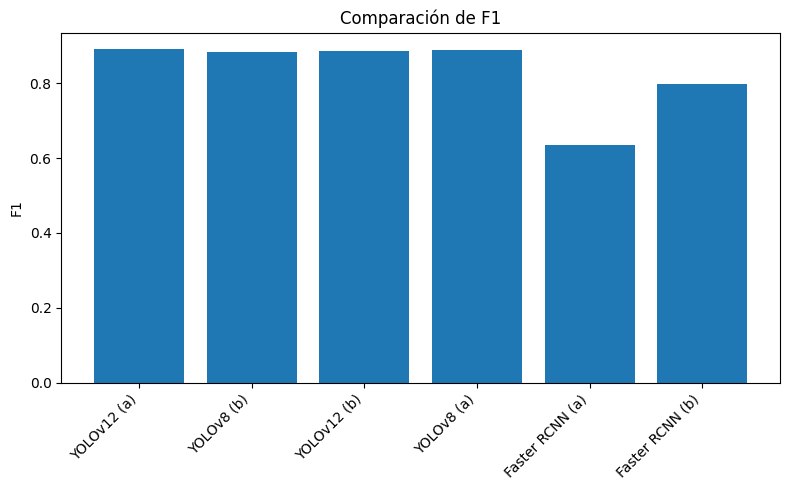

In [3]:

# Cargar el archivo
archivo = "resultados.xlsx"  # Cambia por la ruta correcta
df = pd.read_excel(archivo)

# Seleccionar columnas de interés
modelos = df['ID']
metricas = ['mAP50', 'mAP50-95', 'Precision', 'Recall', 'F1']

# Configurar gráfico
x = range(len(modelos))

for metrica in metricas:
    plt.figure(figsize=(8, 5))
    plt.bar(x, df[metrica], tick_label=modelos)
    plt.ylabel(metrica)
    plt.title(f'Comparación de {metrica}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


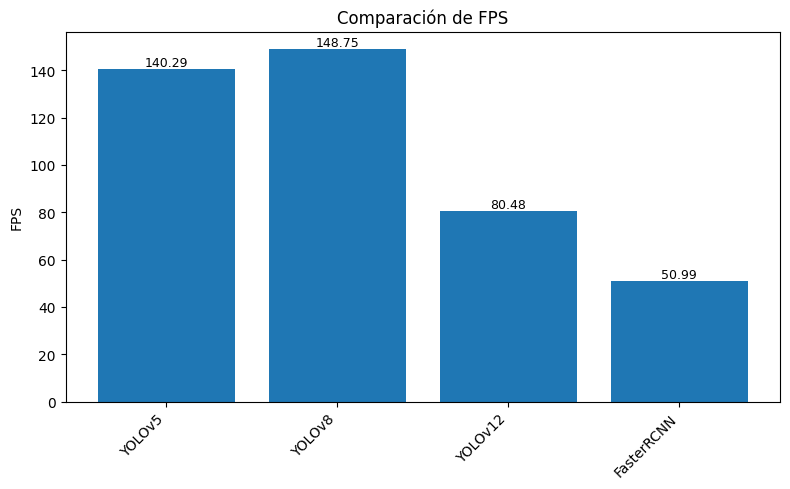

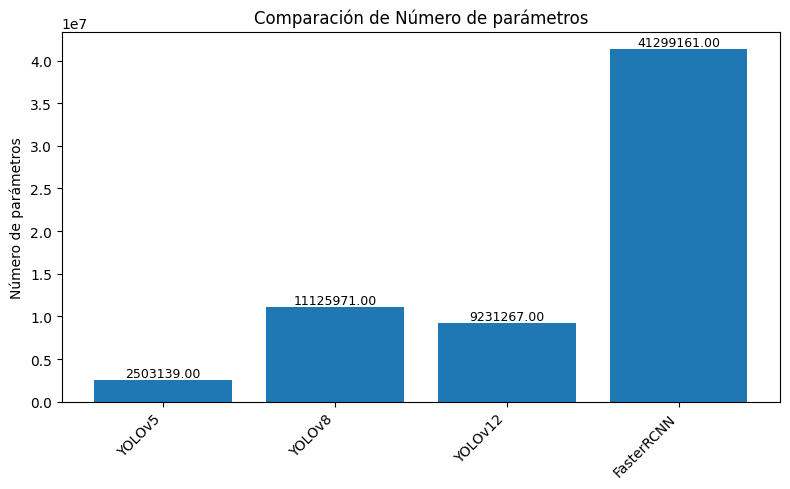

In [6]:

# Cargar el archivo
archivo = "resultados_tiempos_param.xlsx"  # Cambia por la ruta correcta
df = pd.read_excel(archivo)

# Seleccionar columnas de interés
modelos = df['ID']
metricas = ['FPS','Número de parámetros']

# Configurar gráfico
x = range(len(modelos))

for metrica in metricas:
    x = range(len(df))
    y = df[metrica]
    plt.figure(figsize=(8, 5))
    # Agregar los valores encima de cada barra
    for i, v in enumerate(y):
        plt.text(i, v + 0.002, f"{v:.2f}", ha='center', va='bottom', fontsize=9)
    plt.bar(x, df[metrica], tick_label=modelos)
    plt.ylabel(metrica)
    plt.title(f'Comparación de {metrica}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


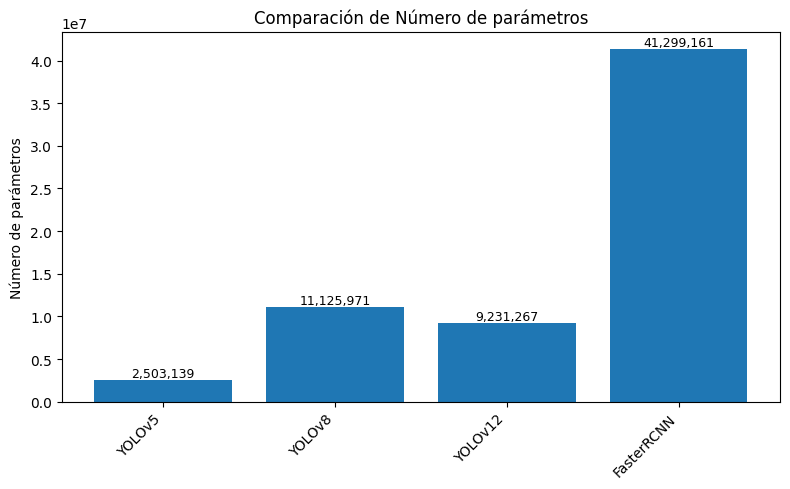

In [11]:

# Cargar el archivo
archivo = "resultados_tiempos_param.xlsx"  # Cambia por la ruta correcta
df = pd.read_excel(archivo)

# Seleccionar columnas de interés
modelos = df['ID']
metricas = ['Número de parámetros']

# Configurar gráfico
x = range(len(modelos))

for metrica in metricas:
    x = range(len(df))
    y = df[metrica]
    plt.figure(figsize=(8, 5))
    # Agregar los valores encima de cada barra
    for i, v in enumerate(y):
        plt.text(i, v + 0.002, f"{v:,.0f}", ha='center', va='bottom', fontsize=9)
    plt.bar(x, df[metrica], tick_label=modelos)
    plt.ylabel(metrica)
    plt.title(f'Comparación de {metrica}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


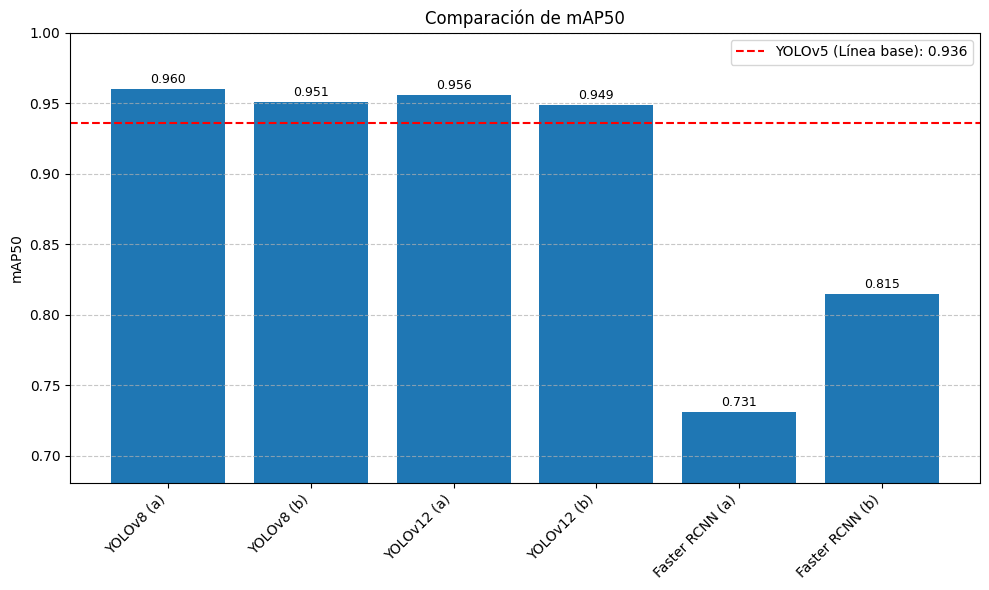

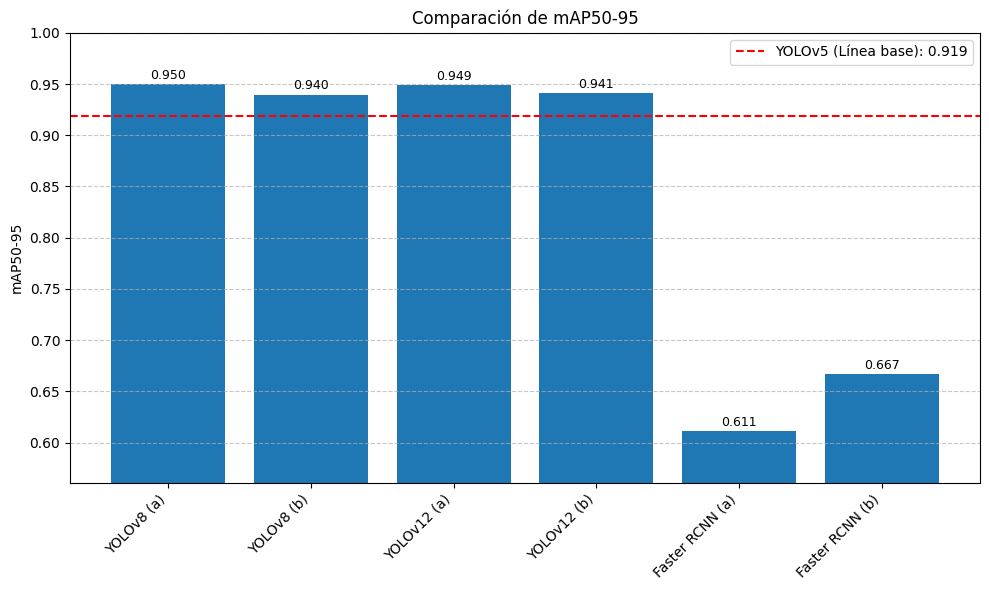

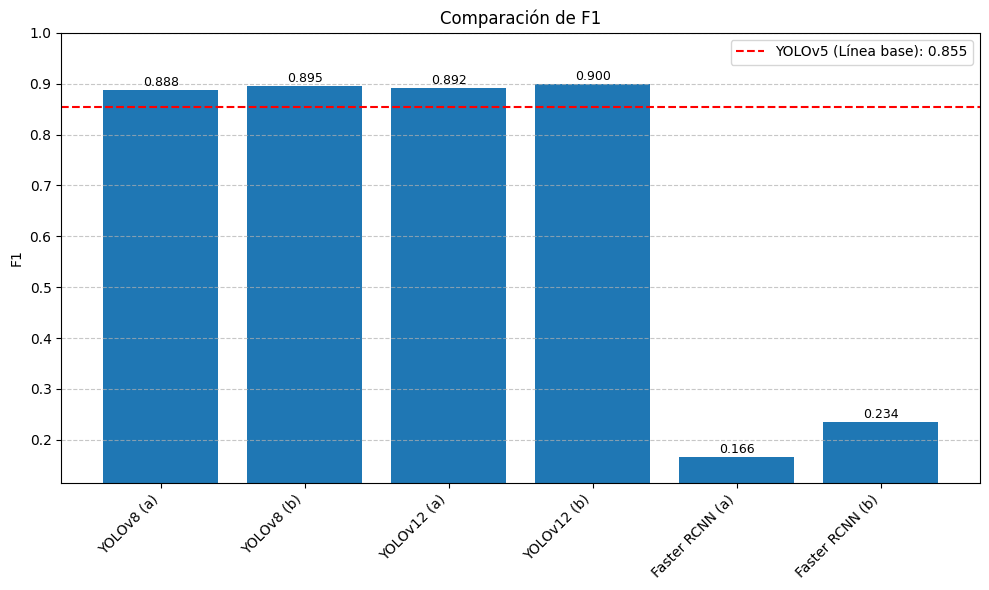

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar archivo
archivo = "resultadosO3.xlsx"  # Cambia por tu ruta
df = pd.read_excel(archivo)

# Columnas de interés
metricas = ['mAP50', 'mAP50-95', 'F1']

# Identificar el modelo YOLOv5 como línea base
baseline_row = df[df['ID'].str.contains('YOLOv5', case=False)]
if baseline_row.empty:
    raise ValueError("No se encontró el modelo YOLOv5 en el archivo.")
baseline_values = baseline_row.iloc[0]

# Modelos sin incluir la línea base para las barras
df_bar = df[~df['ID'].str.contains('YOLOv5', case=False)]

# Graficar cada métrica
for metrica in metricas:
    plt.figure(figsize=(10, 6))
    
    x = range(len(df_bar))
    y = df_bar[metrica]

    plt.bar(x, y, tick_label=df_bar['ID'])

    # Agregar los valores encima de cada barra
    for i, v in enumerate(y):
        plt.text(i, v + 0.002, f"{v:.3f}", ha='center', va='bottom', fontsize=9)

    # Línea base del modelo YOLOv5
    baseline_value = baseline_values[metrica]
    plt.axhline(baseline_value, color='red', linestyle='--', label=f'YOLOv5 (Línea base): {baseline_value:.3f}')
    
    # Configurar límites del eje Y
    ymin = min(y.min(), baseline_value)
    plt.ylim(bottom=max(ymin - 0.05, 0), top=1.0)

    plt.ylabel(metrica)
    plt.title(f'Comparación de {metrica}')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
